In [3]:
import cv2
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import imutils
from __future__ import print_function
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import argparse

In [4]:
def plot_img(img, f_size=(10,10)):
    plt.figure(figsize=f_size)
    plt.imshow(img)
    
def plot_gray_img(img, f_size=(10,10)):
    if img.max() <= 1:
        arr = img * 255
    else:
        arr = img.astype(float)
    im = Image.fromarray(arr)
    
    plot_img(im, f_size)
    
PATH = './images/task_2/'

There are 2 functions for estimation number of objects but in most cases the first function works better

$count\_1$ - function for estimation number of objects

$img$ - number of input image

$f_size$ - spatial and color window radius

$qnts$ - quantiles for rejecting outliers (very large and very small contours)

In [1]:
def count_1(img, f_size=(11, 11), qnts=(0.45, 1)):
    
    image = mpimg.imread(PATH + 'count%s.jpg' % img)
    
    shifted = cv2.pyrMeanShiftFiltering(image, f_size[0], f_size[1])
    
    gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     cnts = imutils.grab_contours(cnts)
    
    areas = []
    for cnt in cnts:
        areas.append(cv2.contourArea(cnt))
        
    areas = np.array(areas)
    
    bottom_bound = np.quantile(areas, qnts[0])
    top_bound = np.quantile(areas, qnts[1])
    
    new_cnts = []
    for cnt in cnts:
        area = cv2.contourArea(cnt)
        if area >= bottom_bound and area <= top_bound:
            new_cnts.append(cnt)
            
    cnts = new_cnts
    
    print("[INFO] {} unique contours found".format(len(cnts)))
 
    # loop over the contours
    for (i, c) in enumerate(cnts):
        # draw the contour
        ((x, y), _) = cv2.minEnclosingCircle(c)
        cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
    
    plot_img(image)


In [5]:
def count_2(image, threshold = 125, f_size=(11, 11)):

    img = mpimg.imread(PATH + 'count%s.jpg' % image)

    shifted = cv2.pyrMeanShiftFiltering(img, f_size[0], f_size[1])

    gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)[1]

    kernel = np.ones((5,5), np.uint8) 
    thresh = cv2.dilate(thresh, kernel, iterations=1) 

    # find contours in the thresholded image
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    print("[INFO] {} unique contours found".format(len(cnts)))

    image = img.copy()

    # loop over the contours
    for (i, c) in enumerate(cnts):
        # draw the contour
        ((x, y), _) = cv2.minEnclosingCircle(c)
    #     cv2.putText(image, "#{}".format(i + 1), (int(x) - 10, int(y)),
    #         cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
        cv2.drawContours(image, [c], -1, (0, 255, 0), 2)

    plot_img(image)

In [6]:
count_1(1, (21,21), (0.4, 0.994))
count_2(1, 180)

TypeError: Expected cv::UMat for argument 'contour'

[INFO] 151 unique contours found


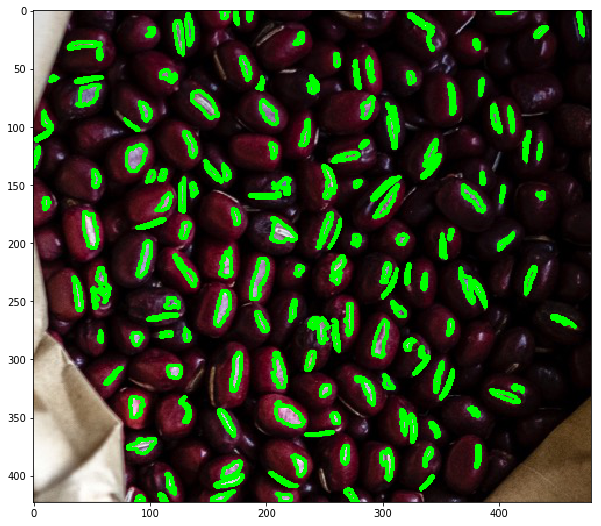

In [204]:
count_1(2, (11,21), (0.45, 0.99))

[INFO] 227 unique contours found


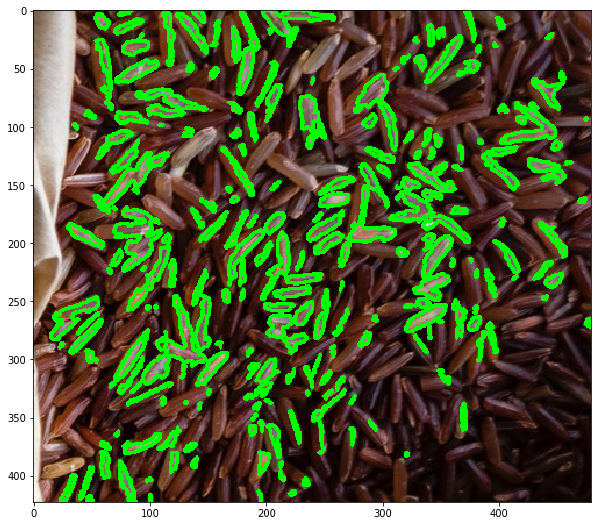

In [205]:
count_1(3, (21,51), (0.45, 0.99))

[INFO] 33 unique contours found


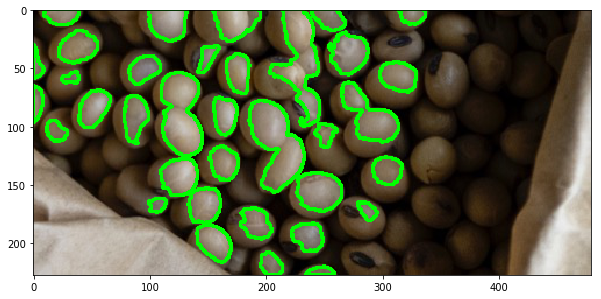

In [220]:
count_1(4, (11,21), (0.15, 0.97))

[INFO] 141 unique contours found


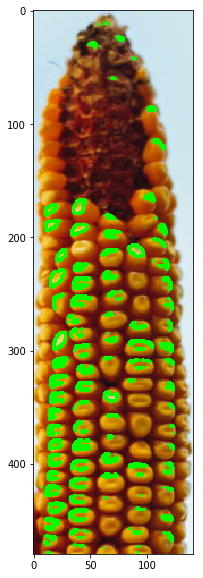

In [207]:
count_1(5, (11,21), (0.1, 0.99))

[INFO] 356 unique contours found


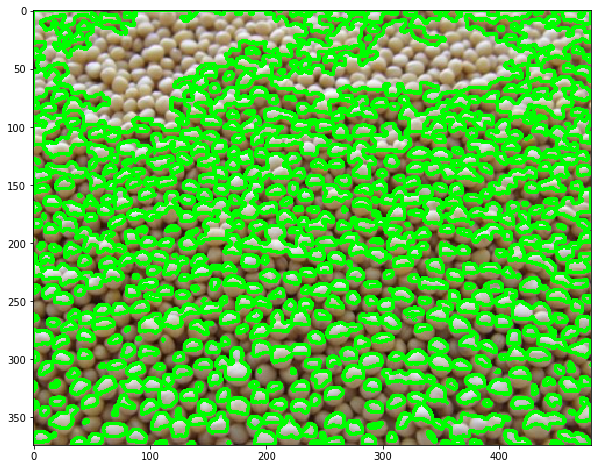

In [208]:
count_1(6, (31,31), (0.001, 1))

[INFO] 88 unique contours found


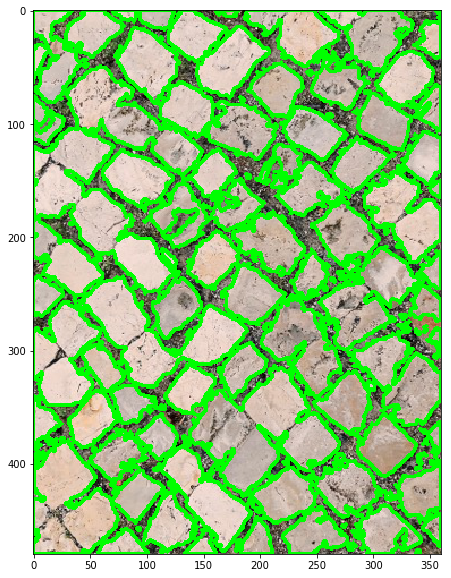

In [209]:
count_1(7, (11,21), (0.9, 1))

[INFO] 62 unique contours found


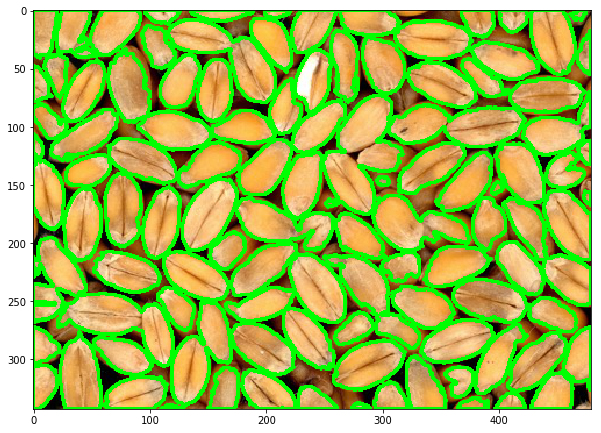

In [210]:
count_1(8, (11,21), (0.35, 1))

[INFO] 1 unique contours found


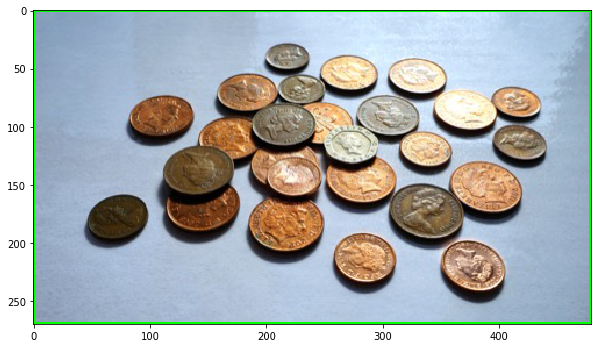

In [211]:
count_1(9, (11,21), (0, 1))

[INFO] 10 unique contours found


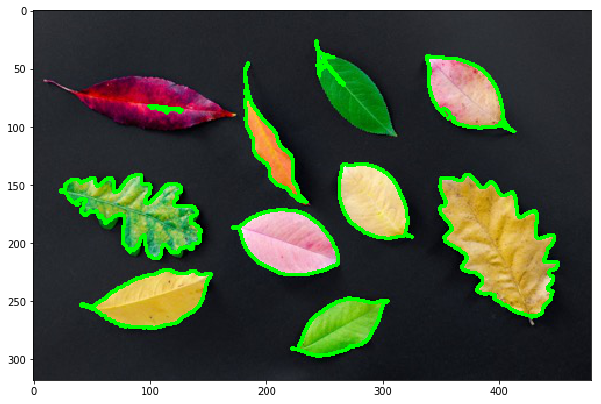

In [212]:
count_1(10, (11,21), (0.8, 1))

[INFO] 14 unique contours found


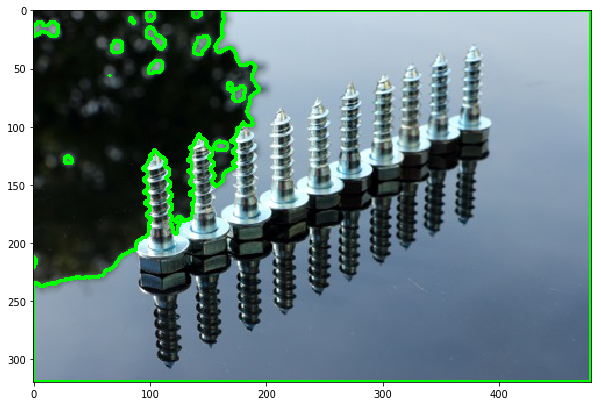

In [213]:
count_1(11, (21,21), (0, 1))

[INFO] 176 unique contours found


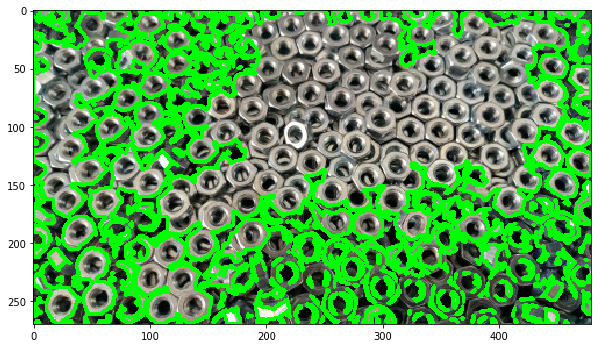

In [214]:
count_1(12, (21,21), (0.5, 1))